In [157]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# This is a basic reproduction of
# https://github.com/michael-0acf4/auto-diff-playground/blob/main/cpp/main.cpp#L25
points = [(1, 2), (2, 2.5), (2, 3.5), (2, 1.5), (1, 1), (4, 3.5)]

In [159]:
n = 100
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
for i in range(n):
    # Note: don't forget to reset the gradients for leaf nodes
    a.grad = None
    b.grad = None

    loss = torch.tensor([0.0])
    for x, y in points:
        loss += (y - (a * x + b)) ** 2
    loss /= len(points)  
    loss.backward()
    if i % 25 == 0:
        print(f"Epoch {i + 1}, Loss {loss.data}")
    with torch.no_grad():
        # Note: -∇E for minimal
        a += -0.1 * a.grad
        b += -0.1 * b.grad

print(a.data, b.data)

Epoch 1, Loss tensor([2.8007])
Epoch 26, Loss tensor([0.4459])
Epoch 51, Loss tensor([0.4447])
Epoch 76, Loss tensor([0.4445])
tensor([0.6693]) tensor([0.9937])


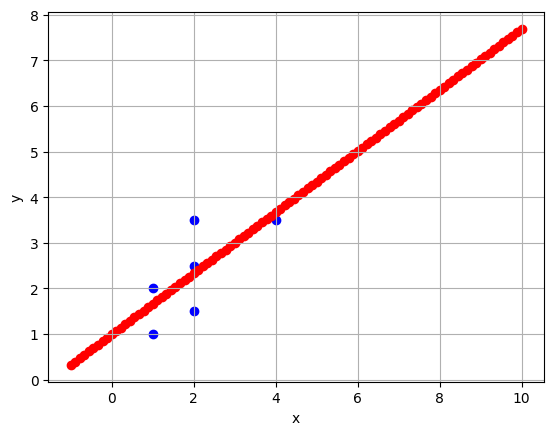

In [160]:
xs, ys = zip(*points)
plt.scatter(xs, ys, color="blue", label="Points")
with torch.no_grad():
    xsd, ysd = zip(*[(xi.data, (a*xi + b).data)  for xi in torch.linspace(-1, 10, steps=100)])
    plt.scatter(xsd, ysd, color="red", label=f"Line {a.data}x + {b.data}")

plt.xlabel("x"); plt.ylabel("y")
plt.grid()
plt.show()